<a href="https://colab.research.google.com/github/SowmyaDontha88/Feature_Selection/blob/main/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# **Problem Statement--> To apply different feature selection techniques**

# **Collecting and Understanding the data**

In [ ]:
data = pd.read_csv('/content/media prediction and its cost.csv')

In [ ]:
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53296 entries, 0 to 53295
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               53296 non-null  object 
 1   food_department             53296 non-null  object 
 2   food_family                 53296 non-null  object 
 3   store_sales(in millions)    53296 non-null  float64
 4   store_cost(in millions)     53296 non-null  float64
 5   unit_sales(in millions)     53296 non-null  float64
 6   promotion_name              53296 non-null  object 
 7   sales_country               53296 non-null  object 
 8   marital_status              53296 non-null  object 
 9   gender                      53296 non-null  object 
 10  total_children              53296 non-null  float64
 11  education                   53296 non-null  object 
 12  member_card                 53296 non-null  object 
 13  occupation                  532

In [ ]:
data.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,53296.000000,53296.000000,53296.000000,53296.000000,53296.000000,53296.000000,53296.000000,53296.000000,53296.000000,53296.000000,...,53296.000000,53296.000000,53296.000000,53296.000000,53296.000000,53295.000000,53295.000000,53295.000000,53295.000000,53295.000000
mean,6.543211,2.620356,3.094135,2.533642,2.197576,0.829762,2.197576,2.116011,13.793103,11.778268,...,27985.101865,19128.195850,5314.190164,3542.737222,0.611603,0.353298,0.587335,0.587335,0.563205,99.315692
std,3.459359,1.452014,0.826395,1.490765,1.110750,1.303329,1.110750,0.933432,4.628089,4.684954,...,5700.417767,3982.559082,1577.384769,1051.457102,0.487390,0.477999,0.492318,0.492318,0.495994,30.023660
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.820000,1.502800,3.000000,1.000000,1.000000,0.000000,1.000000,1.400000,9.670000,7.680000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.384000,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.500000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.486000,4.000000,4.000000,3.000000,1.000000,3.000000,2.800000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [ ]:
data.isnull().any()

food_category                 False
food_department               False
food_family                   False
store_sales(in millions)      False
store_cost(in millions)       False
unit_sales(in millions)       False
promotion_name                False
sales_country                 False
marital_status                False
gender                        False
total_children                False
education                     False
member_card                   False
occupation                    False
houseowner                    False
avg_cars_at home(approx)      False
avg. yearly_income            False
num_children_at_home          False
avg_cars_at home(approx).1    False
brand_name                    False
SRP                           False
gross_weight                  False
net_weight                    False
recyclable_package            False
low_fat                       False
units_per_case                False
store_type                    False
store_city                  

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Create an instance of SimpleImputer with desired strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Define the columns to impute
columns_to_impute = ['video_store', 'salad_bar', 'prepared_food', 'florist', 'cost']

# Perform imputation on the selected columns
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Verify the imputed data
print(data[columns_to_impute].head())

   video_store  salad_bar  prepared_food  florist    cost
0          1.0        1.0            1.0      1.0  126.62
1          1.0        1.0            1.0      1.0   59.86
2          1.0        1.0            1.0      1.0   84.16
3          1.0        1.0            1.0      1.0   95.78
4          1.0        1.0            1.0      1.0   50.79


In [ ]:
# Create an instance of SimpleImputer with desired strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='most_frequent')

# Define the columns to impute
column_to_impute = ['media_type']

# Perform imputation on the selected columns
data[column_to_impute] = imputer.fit_transform(data[column_to_impute])

In [ ]:
data.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

The missing values have been replaced with mean/mode depending upon the particular data type.

In [ ]:
# as we can see there are two columns named 'avg_cars_at home(approx)', so let's drop 1:
data.drop(columns='avg_cars_at home(approx).1',inplace=True)

# **EDA**

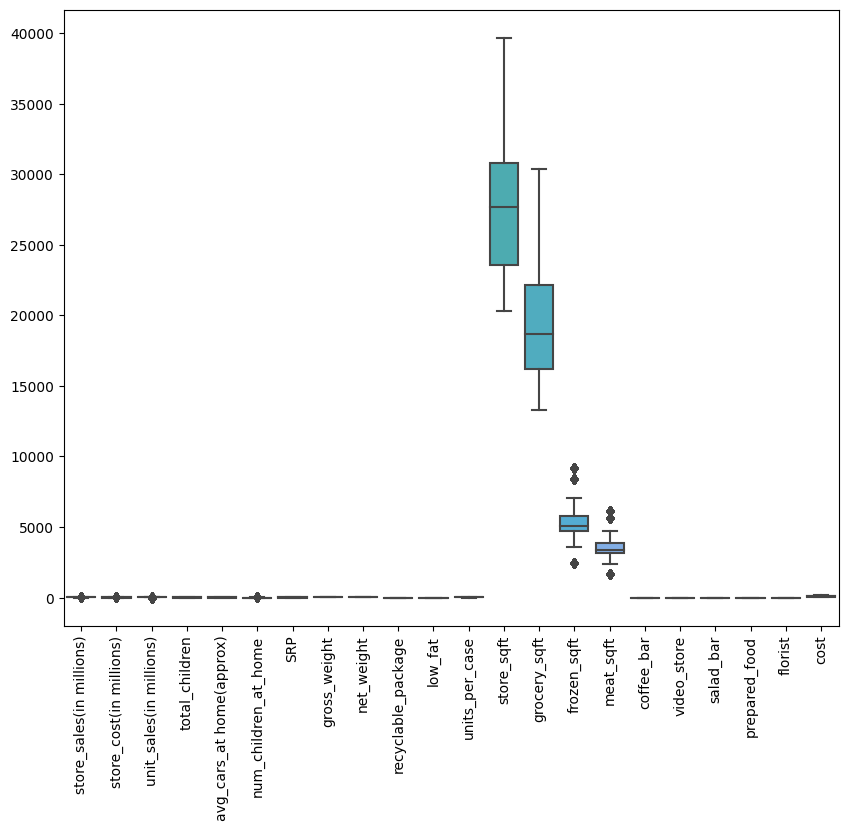

In [ ]:
# Detecting outliners
plt.figure(figsize=(10,8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

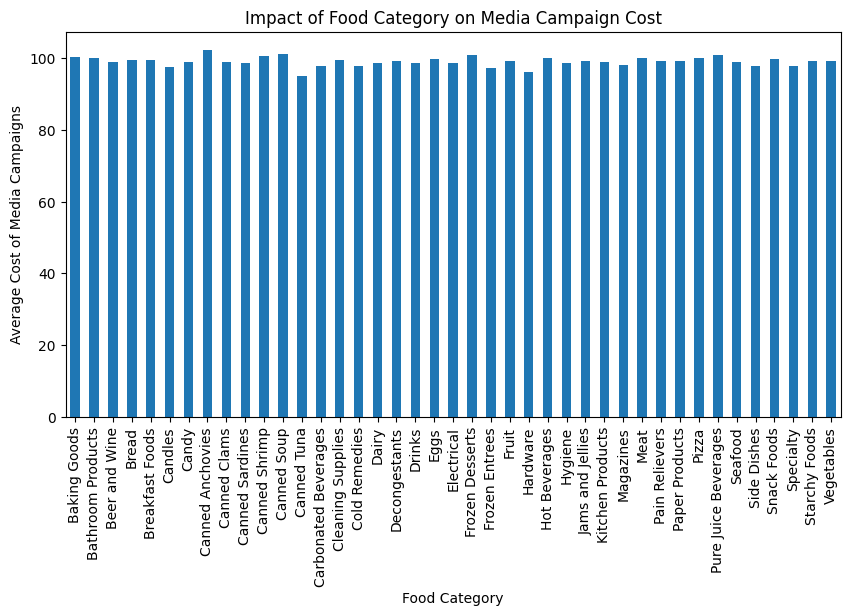

In [ ]:
grouped = data.groupby("food_category").mean()["cost"]

grouped.plot(kind="bar", x="food_category", y="cost", figsize=(10,5))
plt.xlabel("Food Category")
plt.ylabel("Average Cost of Media Campaigns")
plt.title("Impact of Food Category on Media Campaign Cost")
plt.show()

Text(0.5, 1.0, 'Top 10 food-departments selling most food categories')

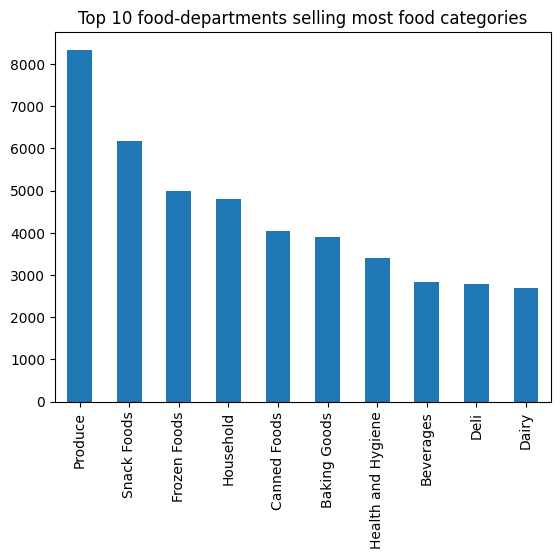

In [ ]:
data['food_department'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 food-departments selling most food categories')

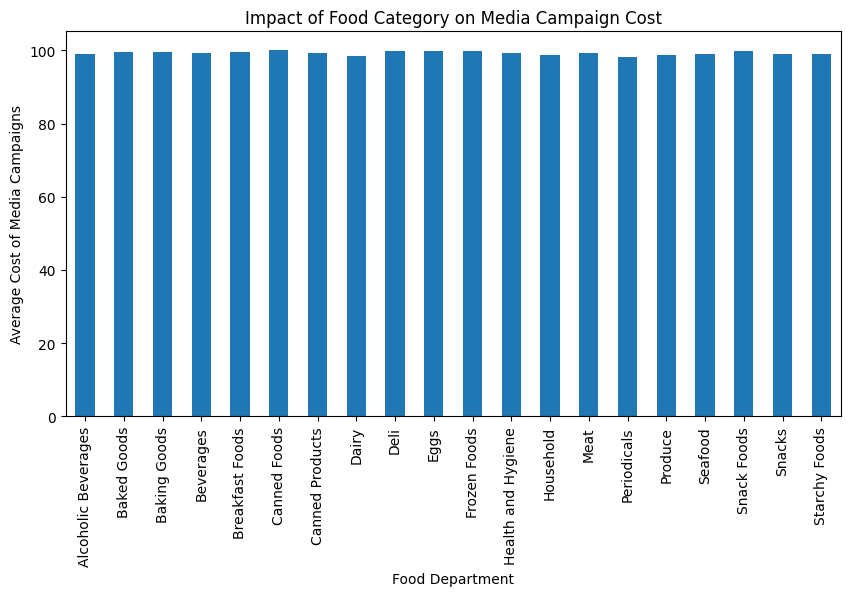

In [ ]:
grouped = data.groupby("food_department").mean()["cost"]

grouped.plot(kind="bar", x="food_department", y="cost", figsize=(10,5))
plt.xlabel("Food Department")
plt.ylabel("Average Cost of Media Campaigns")
plt.title("Impact of Food Category on Media Campaign Cost")
plt.show()

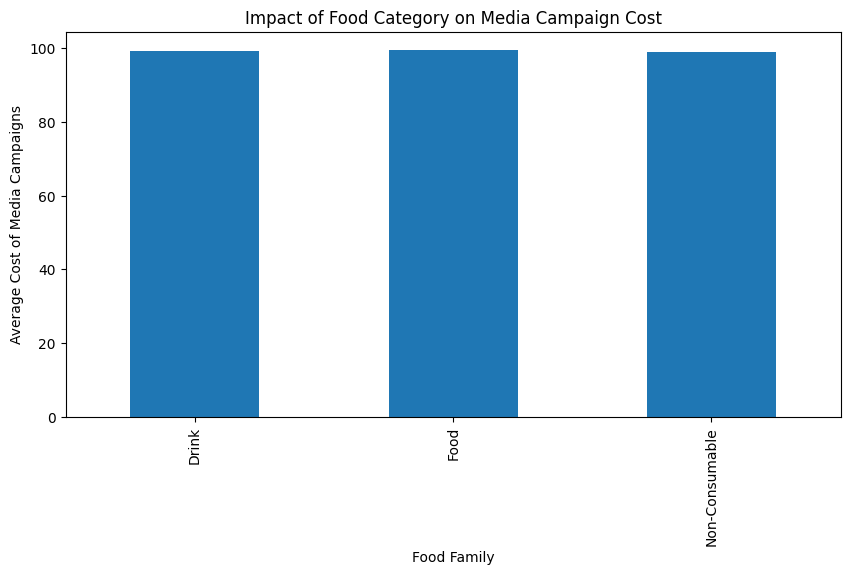

In [ ]:
grouped = data.groupby("food_family").mean()["cost"]

# plot the data
grouped.plot(kind="bar", x="food_family", y="cost", figsize=(10,5))
plt.xlabel("Food Family")
plt.ylabel("Average Cost of Media Campaigns")
plt.title("Impact of Food Category on Media Campaign Cost")
plt.show()

Text(0.5, 1.0, 'Top 10 most sold food categories')

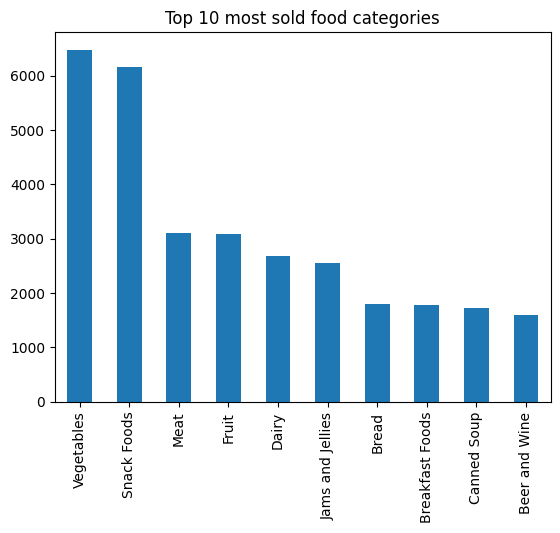

In [ ]:
data['food_category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 most sold food categories')

<Axes: xlabel='store_sales(in millions)', ylabel='Count'>

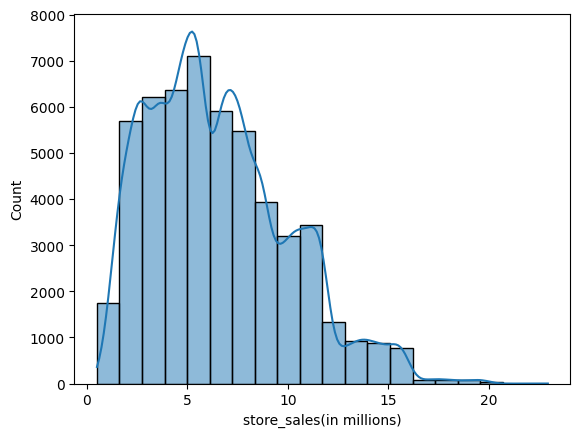

In [ ]:
sns.histplot(data['store_sales(in millions)'],bins=20,kde=True)

<Axes: xlabel='store_cost(in millions)', ylabel='Count'>

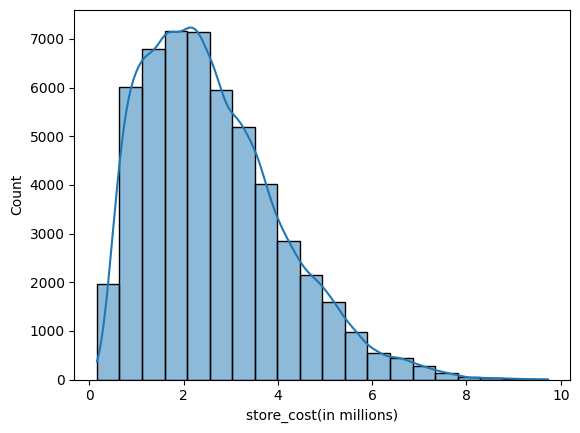

In [ ]:
sns.histplot(data['store_cost(in millions)'],bins=20,kde=True)

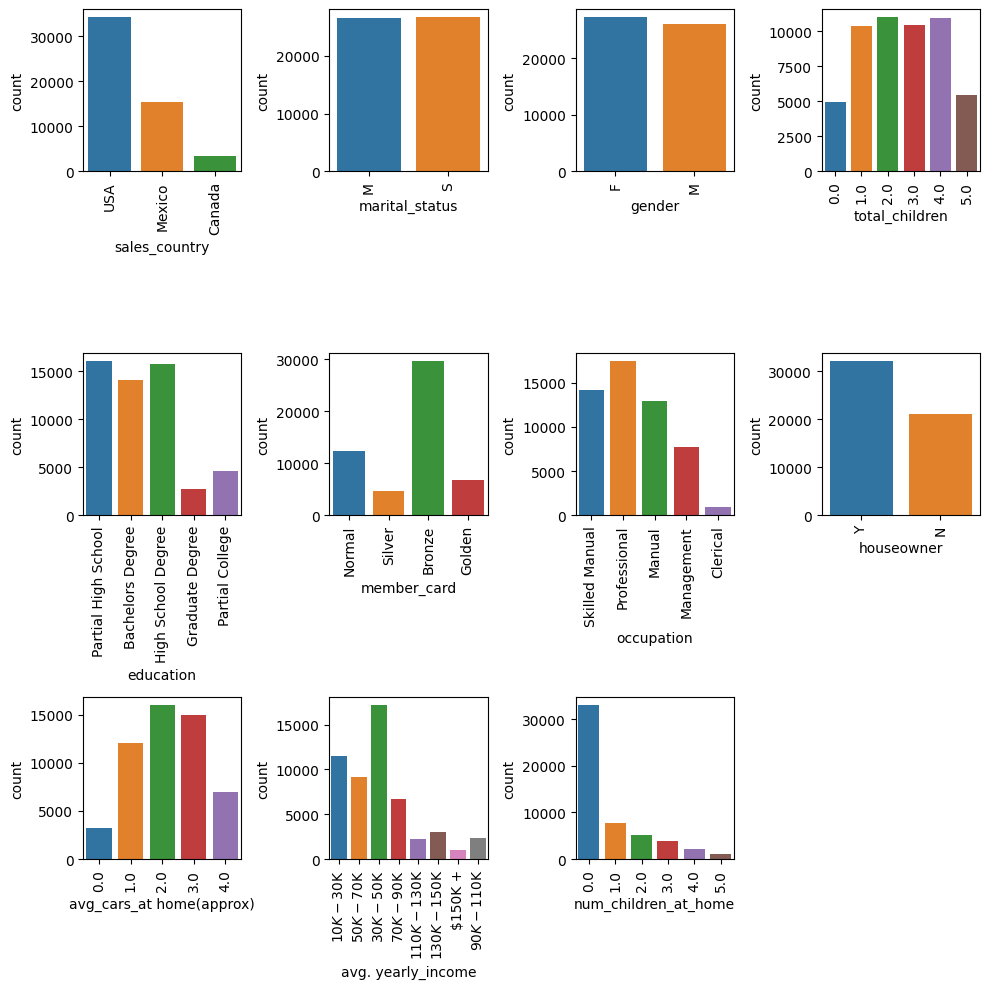

In [ ]:
cols = ['sales_country','marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
      'avg. yearly_income','num_children_at_home',]
plt.figure(figsize=(10,10))      
for i in range(len(cols)):
  plt.subplot(3,4,i+1)
  sns.countplot(x=data[cols].iloc[:,i])
  plt.xticks(rotation=90)  
plt.tight_layout()

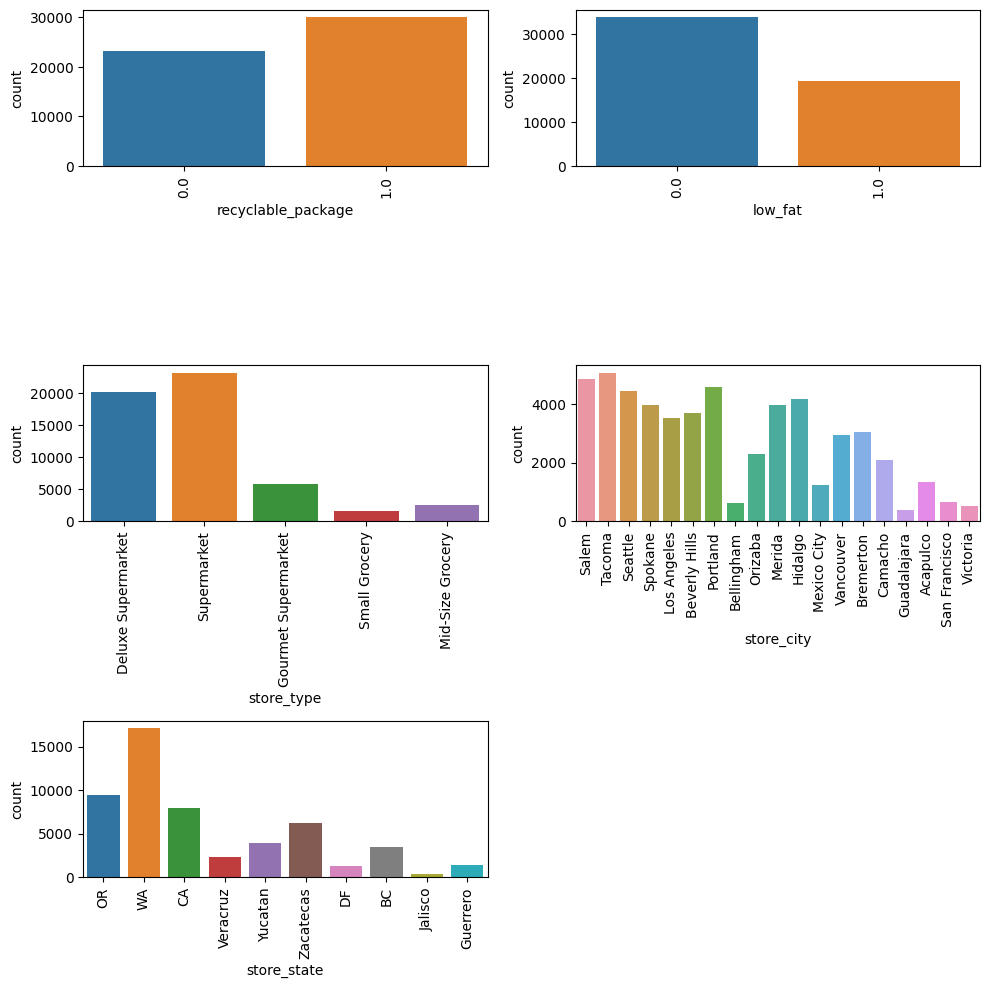

In [ ]:
cols = ['recyclable_package', 'low_fat', 'store_type', 'store_city', 'store_state']
plt.figure(figsize=(10,10))      
for i in range(len(cols)):
  plt.subplot(3,2,i+1)
  sns.countplot(x=data[cols].iloc[:,i])
  plt.xticks(rotation=90)  
plt.tight_layout()

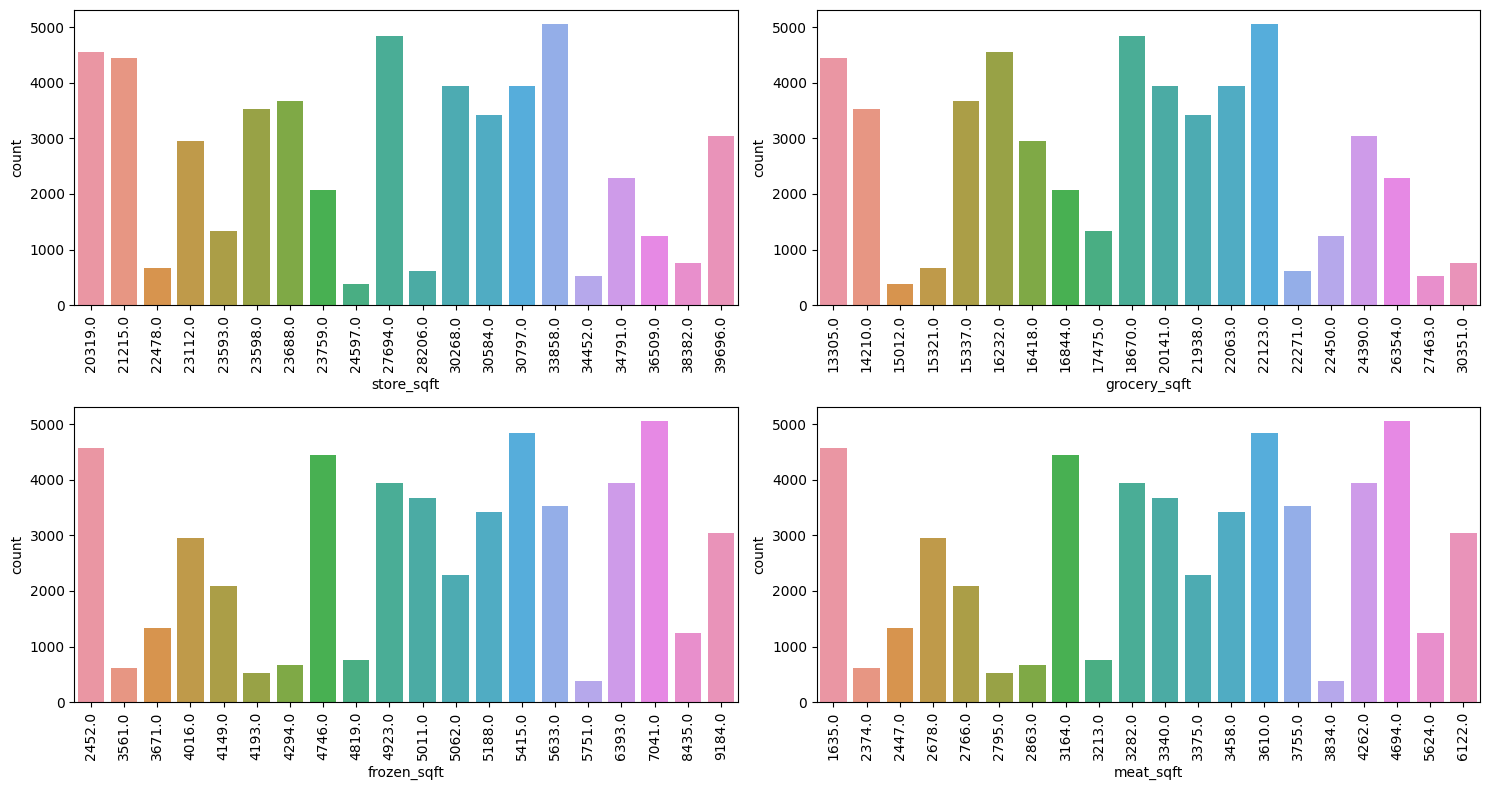

In [ ]:
cols = ['store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft']
plt.figure(figsize=(15,8))      
for i in range(len(cols)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=data[cols].iloc[:,i])
  plt.xticks(rotation=90)  
plt.tight_layout()

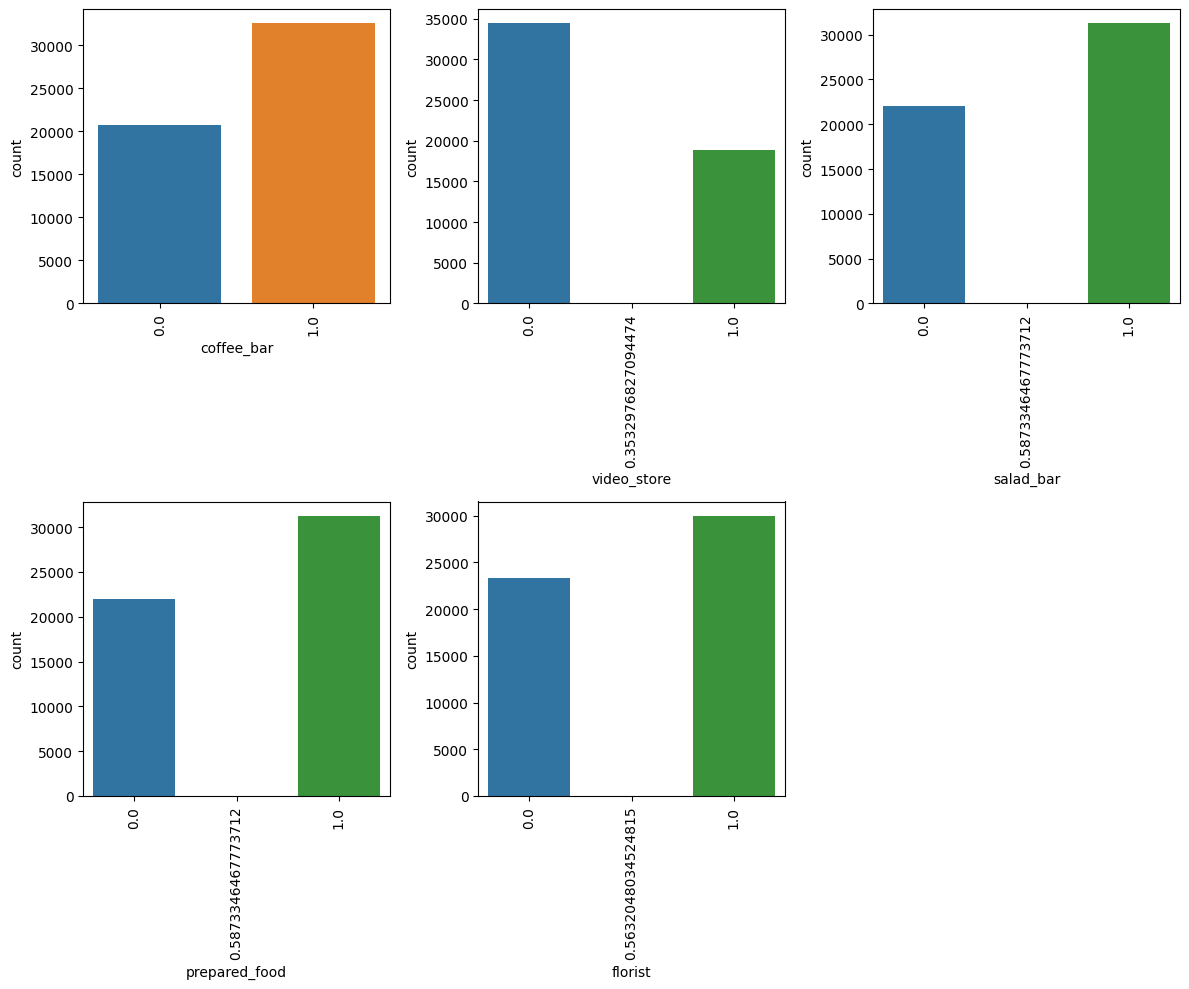

In [ ]:
cols = ['coffee_bar','video_store', 'salad_bar', 'prepared_food', 'florist']
plt.figure(figsize=(12,10))      
for i in range(len(cols)):
  plt.subplot(2,3,i+1)
  sns.countplot(x=data[cols].iloc[:,i])
  plt.xticks(rotation=90)  
plt.tight_layout()

<Axes: xlabel='cost', ylabel='Count'>

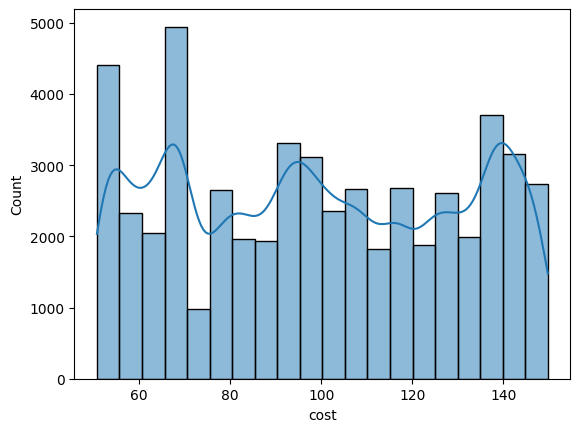

In [ ]:
sns.histplot(data['cost'],bins=20,kde=True)

<Axes: >

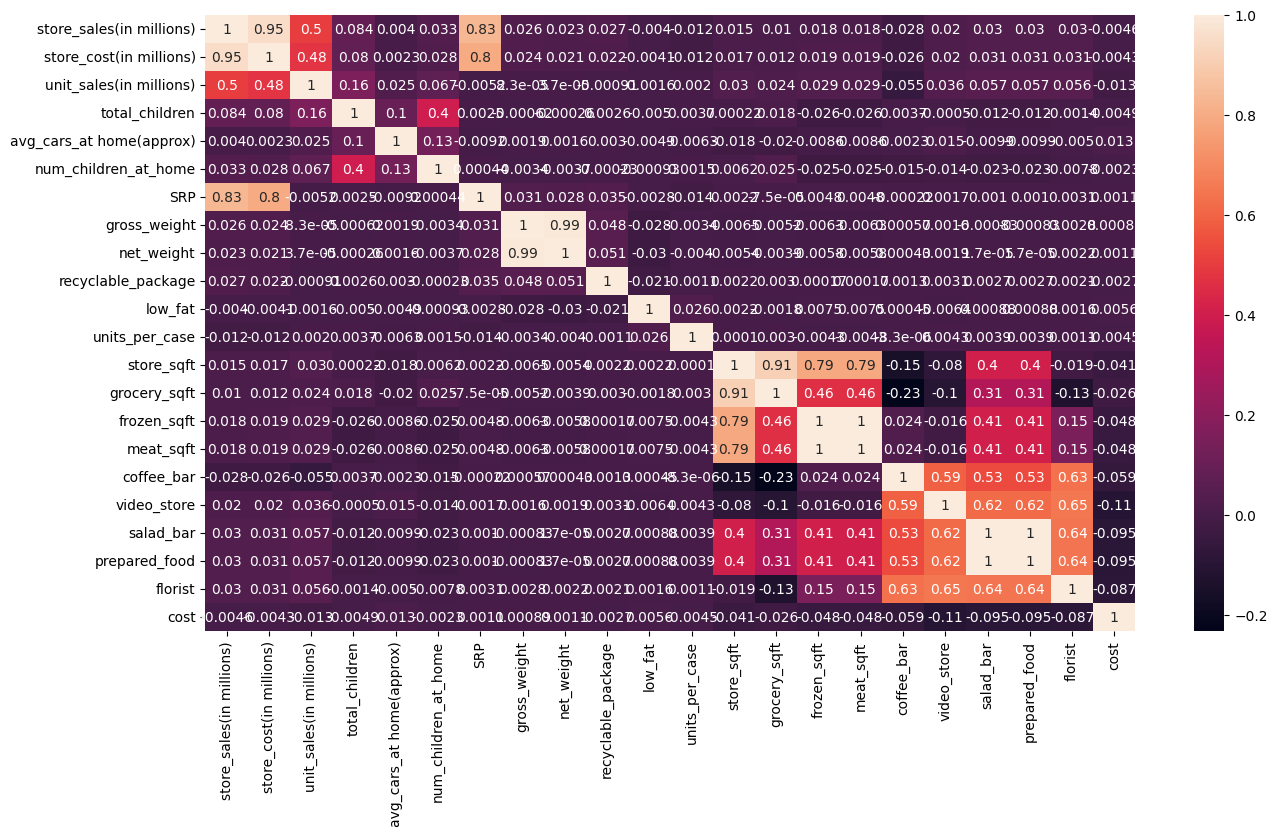

In [ ]:
#Correlation
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

From the heatmap we can say that the target variable cost, is highly correlated with the variables salad_bar,prepared_food,coffe_bar.

In [ ]:
X = data.drop(columns='cost')
y = data['cost']

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
!pip install -q category_encoders
from category_encoders import TargetEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
cat_cols = X_train.select_dtypes(exclude='number').columns.to_list()
cat_cols

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg. yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [ ]:
X_train_te = X_train
X_test_te = X_test

In [ ]:
te = TargetEncoder()
for i in cat_cols:
  X_train_te[i] = te.fit_transform(X_train[i],y_train)
  X_test_te[i] = te.transform(X_test[i])

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_te)
X_test_sc = sc.transform(X_test_te)

X_train_sc = pd.DataFrame(data=X_train_sc,columns=X_train.columns)
X_test_sc = pd.DataFrame(data=X_test_sc,columns=X_test.columns)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# **Model Building**

# Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_sc,y_train)
y_pred = lr.predict(X_test_sc)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))

r2: 0.31776091275051965
rmse: 24.927359908608402


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
knn = KNeighborsRegressor()
knn.fit(X_train_sc,y_train)
y_pred = knn.predict(X_test_sc)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))

r2: 0.3076483828621768
rmse: 25.111423987817314


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))

r2: 0.9986244985720912
rmse: 1.1192793932817404


# **Feature Selection**

# Using Feature Importances from trained Decision Tree:

In [ ]:
# fetching the importance of each feature:
score = dt.feature_importances_
fea_df = pd.DataFrame({'Features':X_train.columns,'Score':score})
fea_df.sort_values(by='Score',ascending=False)

,Features,Score
6,promotion_name,4.493519e-01
37,media_type,2.426603e-01
26,store_city,6.208350e-02
27,store_state,5.707288e-02
31,meat_sqft,5.297760e-02
28,store_sqft,4.350748e-02
29,grocery_sqft,2.549053e-02
30,frozen_sqft,1.903309e-02
7,sales_country,1.582507e-02
36,florist,1.457887e-02


In [ ]:
# taking out cumulative sum to fetch cumulative importance:
fea_df['cum_sum'] = fea_df['Score'].cumsum()
fea_df.sort_values(by='cum_sum',ascending=False)

,Features,Score,cum_sum
37,media_type,2.426603e-01,1.000000
36,florist,1.457887e-02,0.757340
35,prepared_food,1.148099e-03,0.742761
34,salad_bar,4.093690e-05,0.741613
33,video_store,3.048797e-04,0.741572
32,coffee_bar,2.291927e-04,0.741267
31,meat_sqft,5.297760e-02,0.741038
30,frozen_sqft,1.903309e-02,0.688060
29,grocery_sqft,2.549053e-02,0.669027
28,store_sqft,4.350748e-02,0.643537


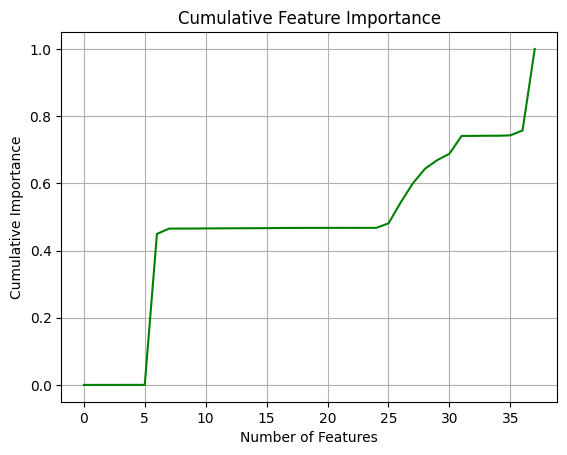

In [ ]:
# Plot the cumulative importances
plt.plot(range(len(score)), fea_df['cum_sum'], 'g-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid(True)
plt.show()

In [ ]:
#setting a threshold as per the graph:
threshold = 0.45
sel_features = fea_df[fea_df['cum_sum'] > threshold]['Features'].values
sel_features

array(['sales_country', 'marital_status', 'gender', 'total_children',
       'education', 'member_card', 'occupation', 'houseowner',
       'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist',
       'media_type'], dtype=object)

In [ ]:
# training a new DT on selected features:
X_train_fe = X_train[sel_features]
X_test_fe = X_test[sel_features]

dt = DecisionTreeRegressor()
dt.fit(X_train_fe,y_train)
y_pred = dt.predict(X_test_fe)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))

r2: 0.4200040890026009
rmse: 22.983726830310157


# Selecting the features using VIF:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['Features'] = X_train.columns
vif_df['Values'] = [variance_inflation_factor(X_train_sc,i) for i in range(len(X_train.columns))]


In [ ]:
vif_df.sort_values(by='Values',ascending=False)

,Features,Values
35,prepared_food,inf
34,salad_bar,inf
28,store_sqft,5.700691e+08
29,grocery_sqft,2.791699e+08
30,frozen_sqft,7.025240e+07
31,meat_sqft,2.182800e+07
20,gross_weight,4.418176e+01
21,net_weight,4.417389e+01
3,store_sales(in millions),3.045075e+01
19,SRP,1.505432e+01


In [ ]:
#setting a threshold:
threshold = 8
sel_features = vif_df[vif_df['Values'] <= threshold]['Features'].values
sel_features

array(['food_category', 'food_department', 'food_family',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner',
       'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'brand_name', 'recyclable_package',
       'low_fat', 'units_per_case', 'store_type', 'store_city',
       'store_state', 'coffee_bar', 'video_store', 'florist',
       'media_type'], dtype=object)

In [ ]:
X_train_fe = X_train[sel_features]
X_test_fe = X_test[sel_features]

dt = DecisionTreeRegressor()
dt.fit(X_train_fe,y_train)
y_pred = dt.predict(X_test_fe)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))

r2: 0.9988360511387253
rmse: 1.0296151761128043


#  Using Forward Selection/ Backward Elimination

In [ ]:
!pip install -q --upgrade mlxtend
!pip install -q --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.1 MB/s eta 0:00:00


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
model = DecisionTreeRegressor()
sfs = SequentialFeatureSelector(estimator=model,k_features='best',forward=True,floating=False,scoring='r2',cv=5)
sfs.fit(X_train_sc,y_train)

SequentialFeatureSelector(estimator=DecisionTreeRegressor(), k_features=(1, 38),
                          scoring='r2')

In [ ]:
sfs.k_score_

0.999789052728055

In [ ]:
sel_features = list(sfs.k_feature_names_)
sel_features

['promotion_name',
 'gender',
 'total_children',
 'education',
 'member_card',
 'houseowner',
 'avg_cars_at home(approx)',
 'avg. yearly_income',
 'num_children_at_home',
 'store_city',
 'store_state',
 'store_sqft',
 'coffee_bar',
 'salad_bar',
 'prepared_food',
 'media_type']

# Using RFECV

In [ ]:
from sklearn.feature_selection import RFECV
rf = RFECV(model,cv=5,scoring='r2')
rf = rf.fit(X_train,y_train)

In [ ]:
# fetching the selected features:
sel_features = rf.get_feature_names_out()
sel_features

array(['promotion_name', 'sales_country', 'total_children', 'occupation',
       'avg_cars_at home(approx)', 'avg. yearly_income',
       'num_children_at_home', 'brand_name', 'store_type', 'store_city',
       'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft',
       'meat_sqft', 'coffee_bar', 'video_store', 'prepared_food',
       'florist', 'media_type'], dtype=object)

In [ ]:
#predicting using the selected features:
y_pred = rf.predict(X_test)
print('r2:',r2_score(y_test,y_pred))
print('rmse:',mean_squared_error(y_test,y_pred,squared=False))

r2: 0.9992671654734926
rmse: 0.8169791000424622


In [ ]:
from collections import Counter

# Define the three feature arrays
features1 = ['food_category', 'food_department', 'food_family', 'unit_sales(in millions)', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'total_children', 'education', 'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'brand_name', 'recyclable_package', 'low_fat', 'units_per_case', 'store_type', 'store_city', 'store_state', 'coffee_bar', 'video_store', 'florist', 'media_type']
features2 = ['promotion_name', 'gender', 'total_children', 'education', 'member_card', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'store_city', 'store_state', 'store_sqft', 'coffee_bar', 'salad_bar', 'prepared_food', 'media_type']
features3 = ['promotion_name', 'sales_country', 'total_children', 'occupation', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home', 'brand_name', 'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'prepared_food', 'florist', 'media_type']

# Combine all features into a single list
all_features = features1 + features2 + features3

# Count the occurrences of each feature
feature_counts = Counter(all_features)

# Sort the features by count in descending order
sorted_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)

# Print the features and their counts in descending order
for feature, count in sorted_features:
    print(f"{feature}: {count}")


promotion_name: 3
total_children: 3
avg_cars_at home(approx): 3
avg. yearly_income: 3
num_children_at_home: 3
store_city: 3
store_state: 3
coffee_bar: 3
media_type: 3
sales_country: 2
gender: 2
education: 2
member_card: 2
occupation: 2
houseowner: 2
brand_name: 2
store_type: 2
video_store: 2
florist: 2
store_sqft: 2
prepared_food: 2
food_category: 1
food_department: 1
food_family: 1
unit_sales(in millions): 1
marital_status: 1
recyclable_package: 1
low_fat: 1
units_per_case: 1
salad_bar: 1
grocery_sqft: 1
frozen_sqft: 1
meat_sqft: 1


The features include promotion_name, total_children, avg_cars_at home(approx), avg. yearly_income, num_children_at_home, store_city, store_state, coffee_bar, and media_type. These features appear three times in your data.

These features are of particular importance or significance in the dataset due to their higher frequency. 